# Caption Providers

This notebook compares the default large model whisper settings with the results we saw from Google Speech and Amazon Transcribe.

In [4]:
import pandas

aws = pandas.read_csv('../docs/output-2024-04-11/report-aws.csv', index_col='druid')
gcp = pandas.read_csv('../docs/output-2024-04-11/report-google.csv', index_col='druid')
whisper = pandas.read_csv('../docs/output-2024-04-11/report-whisper.csv', index_col='druid')

Limit whisper results to the best options we found for the Large model:

In [5]:
whisper = whisper[whisper['options'] == "{'model_name': 'large', 'beam_size': 5, 'patience': 1.0, 'condition_on_previous_text': False, 'best_of': 5}"]
whisper

,run_id,file,language,transcript_filename,transcript_language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions,diff,options
druid,,,,,,,,,,,,,,,,
bb158br2509,bb158br2509-whisper-019,bb158br2509_sl.m4a,en,bb158br2509_script.txt,en,219.484938,0.058720,0.058257,0.081324,0.918676,4300,107,36,123,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
bg405cn7261,bg405cn7261-whisper-067,bg405cn7261_v2_sl.mp4,en,bg405cn7261_v2_sl_script.txt,en,88.899626,0.022913,0.022642,0.031740,0.968260,1813,17,22,3,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
bw689yg2740,bw689yg2740-whisper-163,bw689yg2740_sl.mp4,en,bw689yg2740_script.txt,en,585.138051,0.104156,0.099831,0.135916,0.864084,10622,433,490,255,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
fh290wd1772,fh290wd1772-whisper-211,fh290wd1772_v2_sp_sl.m4a,en,fh290wd1772_v2_sp_sl_script.txt,en,15.008326,0.292754,0.290230,0.388105,0.611895,247,39,3,59,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
gj097zq7635,gj097zq7635-whisper-259,gj097zq7635_a_sl.m4a,en,gj097zq7635_a_sl_script.txt,en,364.681268,0.098677,0.095756,0.135891,0.864109,6903,315,226,190,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
gk220dt2833,gk220dt2833-whisper-307,gk220dt2833_Ali_Shan_10of10_sl.mp4,en,gk220dt2833_Ali_Shan_10of10_sl_script.txt,en,50.418620,0.089799,0.087884,0.121425,0.878575,1069,40,25,38,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
gn213vd3845,gn213vd3845-whisper-355,gn213vd3845_ev_1_sl.mp4,es,gn213vd3845_ev_1_sl_spa_script.txt,es,36.881981,0.236593,0.235479,0.294182,0.705818,487,40,3,107,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
kp010zv7055,kp010zv7055-whisper-403,kp010zv7055_a_sl.m4a,en,kp010zv7055_a_sl_script.txt,en,51.779526,0.776378,0.742470,0.901815,0.098185,171,269,29,195,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."
qf378nj5000,qf378nj5000-whisper-451,qf378nj5000_sl.mp4,en,qf378nj5000_script.txt,en,294.352984,0.137421,0.130864,0.172341,0.827659,5373,257,295,257,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'large', 'beam_size': 5, 'patie..."


In [6]:
df = pandas.DataFrame({
    'aws': aws.wer,
    'gcp': gcp.wer,
    'whisper': whisper.wer,
})
df

,aws,gcp,whisper
druid,,,
bb158br2509,0.066887,0.205077,0.058720
bg405cn7261,0.062739,0.103110,0.022913
bw689yg2740,0.190363,0.219629,0.104156
fh290wd1772,0.855072,0.860870,0.292754
gj097zq7635,0.152268,0.379725,0.098677
gk220dt2833,0.139494,0.329555,0.089799
gn213vd3845,0.159306,0.209779,0.236593
kp010zv7055,0.907087,1.000000,0.776378
qf378nj5000,0.197044,NaN,0.137421


Weird, we seem to be missing results for qf378nj5000 in GCP? We will need to rerun this. For now it will be dropped.

In [7]:
df = df.dropna()
df

,aws,gcp,whisper
druid,,,
bb158br2509,0.066887,0.205077,0.058720
bg405cn7261,0.062739,0.103110,0.022913
bw689yg2740,0.190363,0.219629,0.104156
fh290wd1772,0.855072,0.860870,0.292754
gj097zq7635,0.152268,0.379725,0.098677
gk220dt2833,0.139494,0.329555,0.089799
gn213vd3845,0.159306,0.209779,0.236593
kp010zv7055,0.907087,1.000000,0.776378
tc482fh1865,0.118136,0.204659,0.043261


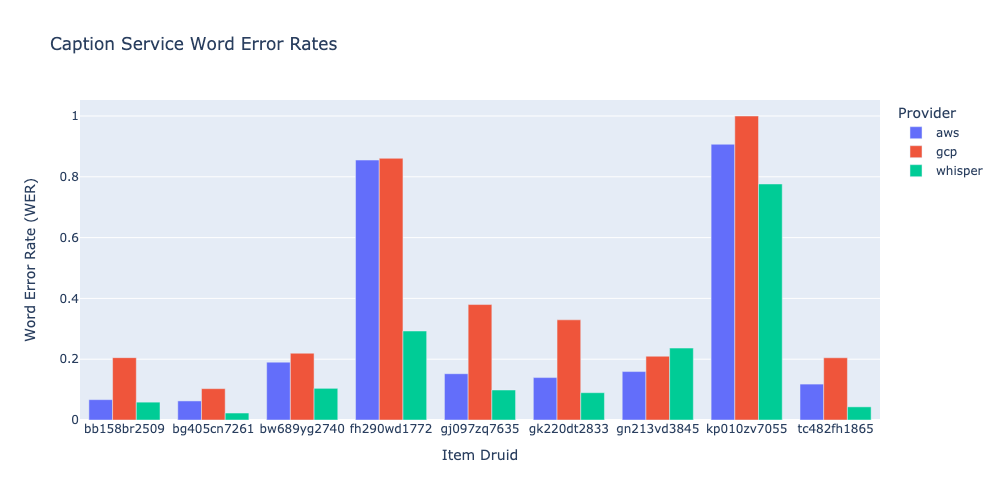

In [10]:
from plotly import express as xp

fig = xp.bar(
    df,
    barmode='group',
    title='Caption Service Word Error Rates',
    labels={
        'value': 'Word Error Rate (WER)',
        'druid': 'Item Druid',
        'variable': 'Provider'
    },
    width=1000
)
fig.show('png')